In [30]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw
import numpy as np
import pandas as pd
from ggplot import *
from sklearn.decomposition import PCA
import os

In [31]:
oxrs = [("CHEMBL3098111", "Merck" ),  ("CHEMBL3867477", "Merck" ),  ("CHEMBL2380240", "Rottapharm" ),
             ("CHEMBL3352684", "Merck" ),  ("CHEMBL3769367", "Merck" ),  ("CHEMBL3526050", "Actelion" ),
             ("CHEMBL3112474", "Actelion" ),  ("CHEMBL3739366", "Heptares" ),  ("CHEMBL3739395", "Actelion" ), 
             ("CHEMBL3351489", "Eisai" )]

In [32]:
fps = []
docs = []
companies = []

for cid, company in oxrs:
    sdf_file = os.path.join("ch08", cid + ".sdf")
    mols = Chem.SDMolSupplier(sdf_file)
    for mol in mols:
        if mol is not None:
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
            arr = np.zeros((1,))
            DataStructs.ConvertToNumpyArray(fp, arr)
            docs.append(cid)
            companies.append(company)
            fps.append(arr)
fps = np.array(fps)
companies = np.array(companies)
docs = np.array(docs)

In [33]:
fps.shape

(293, 2048)

In [49]:
pca = PCA(n_components=2)
x = pca.fit_transform(fps)

In [50]:
d = pd.DataFrame(x)
d.columns = ["PCA1", "PCA2"]
d["DOCID"] = docs
d["COMPANY"] = companies 

In [55]:
g = ggplot(aes(x="PCA1", y="PCA2", color="COMPANY"), data=d) + geom_point() + xlab("X") + ylab("Y")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

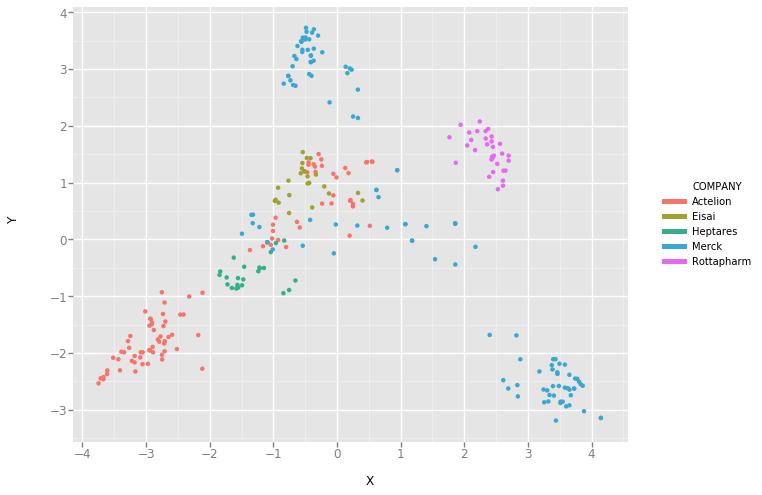

<ggplot: (-9223372029306445031)>

In [56]:
g

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

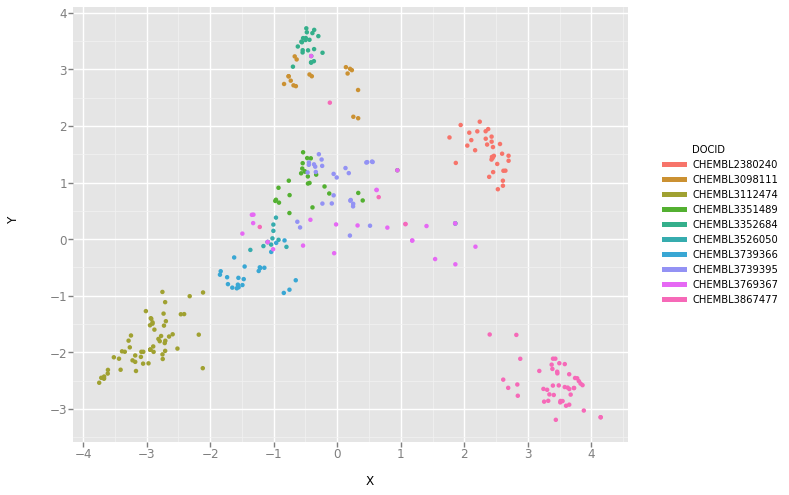

<ggplot: (7548158191)>

In [57]:
g = ggplot(aes(x="PCA1", y="PCA2", color="DOCID"), data=d) + geom_point() + xlab("X") + ylab("Y")
g

In [58]:
from sklearn.manifold import TSNE

In [59]:
tsne = TSNE(n_components=2, random_state=0)
tx = tsne.fit_transform(fps)

In [60]:
d = pd.DataFrame(tx)
d.columns = ["PCA1", "PCA2"]
d["DOCID"] = docs
d["COMPANY"] = companies 
g = ggplot(aes(x="PCA1", y="PCA2", color="COMPANY"), data=d) + geom_point() + xlab("X") + ylab("Y")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

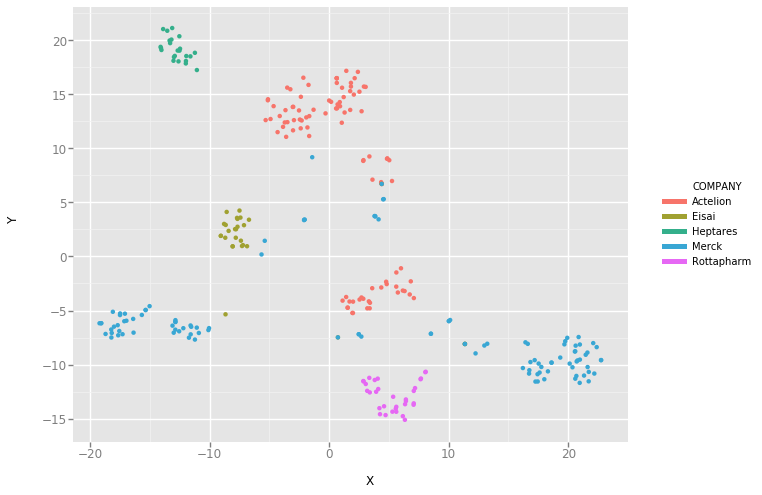

<ggplot: (-9223372029306131894)>

In [61]:
g